In [25]:
import os 
import sys
import pandas as pd

sys.path.append(os.path.abspath('../scripts'))

In [26]:
import pandas as pd

# Load data files
train_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv', dtype={'StateHoliday': 'str'})
test_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\test.csv')
store_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\store.csv')

print("Train missing values:\n", train_file.isnull().sum())
print("\nTest missing values:\n", test_file.isnull().sum())
print("\nStore missing values:\n", store_file.isnull().sum())

# Fill missing values in the 'Open' column with the mode
test_file['Open'] = test_file['Open'].fillna(test_file['Open'].mode()[0])

Train missing values:
 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Test missing values:
 Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store missing values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [27]:
# Fill missing values in the store dataset
store_file['CompetitionDistance'] = store_file['CompetitionDistance'].fillna(store_file['CompetitionDistance'].median())
store_file['CompetitionOpenSinceMonth'] = store_file['CompetitionOpenSinceMonth'].fillna(-1)
store_file['CompetitionOpenSinceYear'] = store_file['CompetitionOpenSinceYear'].fillna(-1)
store_file['Promo2SinceWeek'] = store_file['Promo2SinceWeek'].fillna(-1)
store_file['Promo2SinceYear'] = store_file['Promo2SinceYear'].fillna(-1)
store_file['PromoInterval'] = store_file['PromoInterval'].fillna(-1)

# Check if missing values are handled
print("Missing values in store dataset after filling:")
print(store_file.isnull().sum())

# Convert 'Date' column to datetime
train_file['Date'] = pd.to_datetime(train_file['Date'])
test_file['Date'] = pd.to_datetime(test_file['Date'])

# Check the updated 'Date' column
print("Train 'Date' column after conversion:")
print(train_file['Date'].head())

print("\nTest 'Date' column after conversion:")
print(test_file['Date'].head())

# Create month segments
train_file['MonthSegment'] = pd.cut(train_file['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])
test_file['MonthSegment'] = pd.cut(test_file['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])

# Check the new 'MonthSegment' column
print("Train 'MonthSegment' column:")
print(train_file[['Date', 'MonthSegment']].head())

print("\nTest 'MonthSegment' column:")
print(test_file[['Date', 'MonthSegment']].head())

Missing values in store dataset after filling:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
Train 'Date' column after conversion:
0   2015-07-31
1   2015-07-31
2   2015-07-31
3   2015-07-31
4   2015-07-31
Name: Date, dtype: datetime64[ns]

Test 'Date' column after conversion:
0   2015-09-17
1   2015-09-17
2   2015-09-17
3   2015-09-17
4   2015-09-17
Name: Date, dtype: datetime64[ns]
Train 'MonthSegment' column:
        Date MonthSegment
0 2015-07-31          end
1 2015-07-31          end
2 2015-07-31          end
3 2015-07-31          end
4 2015-07-31          end

Test 'MonthSegment' column:
        Date MonthSegment
0 2015-09-17          mid
1 2015-09-17          mid
2 2015-09-17          mid
3 2015-09-17      

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the datasets
train_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv', dtype={'StateHoliday': 'str'})
test_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\test.csv')
store_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\store.csv')

# Step 1: Handle Missing Values
# 1.1 Test Dataset: Fill missing values in the 'Open' column with the mode
test_file['Open'] = test_file['Open'].fillna(test_file['Open'].mode()[0])

# 1.2 Store Dataset: Fill missing values
store_file['CompetitionDistance'] = store_file['CompetitionDistance'].fillna(store_file['CompetitionDistance'].median())
store_file['CompetitionOpenSinceMonth'] = store_file['CompetitionOpenSinceMonth'].fillna(-1)
store_file['CompetitionOpenSinceYear'] = store_file['CompetitionOpenSinceYear'].fillna(-1)
store_file['Promo2SinceWeek'] = store_file['Promo2SinceWeek'].fillna(-1)
store_file['Promo2SinceYear'] = store_file['Promo2SinceYear'].fillna(-1)
store_file['PromoInterval'] = store_file['PromoInterval'].fillna(-1)

# Step 2: Feature Extraction from 'Date' Column
# 2.1 Convert 'Date' column to datetime
train_file['Date'] = pd.to_datetime(train_file['Date'])
test_file['Date'] = pd.to_datetime(test_file['Date'])

# 2.2 Extract Weekdays
train_file['Weekday'] = train_file['Date'].dt.day_name()
test_file['Weekday'] = test_file['Date'].dt.day_name()

# 2.3 Create a Weekend Flag
train_file['Weekend'] = train_file['Date'].dt.dayofweek.isin([5, 6]).astype(int)
test_file['Weekend'] = test_file['Date'].dt.dayofweek.isin([5, 6]).astype(int)

# 2.4 Create Month Segments
train_file['MonthSegment'] = pd.cut(train_file['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])
test_file['MonthSegment'] = pd.cut(test_file['Date'].dt.day, bins=[0, 10, 20, 31], labels=['beginning', 'mid', 'end'])

# 2.5 Days to Holidays
# Create a list of holiday dates
holiday_dates = train_file[(train_file['StateHoliday'] != '0') | (train_file['SchoolHoliday'] == 1)]['Date'].unique()
holiday_dates = pd.to_datetime(holiday_dates)

# Sort the holiday dates
holiday_dates = np.sort(holiday_dates)

# Function to calculate days to the next holiday
def days_to_next_holiday(date, holiday_dates):
    next_holiday = holiday_dates[holiday_dates >= date]
    if len(next_holiday) > 0:
        return (next_holiday[0] - date).days
    else:
        return np.nan  # No future holiday found

# Apply the function to calculate days to the next holiday
train_file['DaysToHoliday'] = train_file['Date'].apply(lambda x: days_to_next_holiday(x, holiday_dates))
test_file['DaysToHoliday'] = test_file['Date'].apply(lambda x: days_to_next_holiday(x, holiday_dates))

# Fill NaN values (if no future holiday exists) with a large number (e.g., 365)
train_file['DaysToHoliday'] = train_file['DaysToHoliday'].fillna(365)
test_file['DaysToHoliday'] = test_file['DaysToHoliday'].fillna(365)

# 2.6 Days After Holidays
# Function to calculate days since the last holiday
def days_since_last_holiday(date, holiday_dates):
    last_holiday = holiday_dates[holiday_dates <= date]
    if len(last_holiday) > 0:
        return (date - last_holiday[-1]).days
    else:
        return np.nan  # No past holiday found

# Apply the function to calculate days since the last holiday
train_file['DaysAfterHoliday'] = train_file['Date'].apply(lambda x: days_since_last_holiday(x, holiday_dates))
test_file['DaysAfterHoliday'] = test_file['Date'].apply(lambda x: days_since_last_holiday(x, holiday_dates))

# Fill NaN values (if no past holiday exists) with a large number (e.g., 365)
train_file['DaysAfterHoliday'] = train_file['DaysAfterHoliday'].fillna(365)
test_file['DaysAfterHoliday'] = test_file['DaysAfterHoliday'].fillna(365)

# Step 3: Merge Datasets
# Merge train and store datasets
train_file = train_file.merge(store_file, on='Store', how='left')
test_file = test_file.merge(store_file, on='Store', how='left')

# Step 4: Scale Numeric Features
# Select numeric columns to scale (only columns present in both datasets)
numeric_cols = ['CompetitionDistance', 'Promo2SinceWeek', 'Promo2SinceYear']

# Initialize the scaler
scaler = StandardScaler()

# Scale numeric columns in train and test datasets
train_file[numeric_cols] = scaler.fit_transform(train_file[numeric_cols])
test_file[numeric_cols] = scaler.transform(test_file[numeric_cols])

# Display the final preprocessed datasets
print("Train Dataset after Preprocessing:")
print(train_file.head())

print("\nTest Dataset after Preprocessing:")
print(test_file.head())

Train Dataset after Preprocessing:
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday Weekday  ...  DaysAfterHoliday StoreType  Assortment  \
0              1  Friday  ...                 0         c           a   
1              1  Friday  ...                 0         a           a   
2              1  Friday  ...                 0         a           a   
3              1  Friday  ...                 0         c           c   
4              1  Friday  ...                 0         a           a   

   CompetitionDistance CompetitionOpenSinceMonth Competit

In [39]:
import logging
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from datetime import datetime

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def create_sliding_window(data, window_size):
    """
    Create sliding window sequences for time-series data.
    
    Args:
        data (np.array): Time-series data.
        window_size (int): Size of the sliding window.
    
    Returns:
        tuple: (X, y) where X is the input sequences and y is the target values.
    """
    logging.info("Creating sliding window sequences.")
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

def lstm_prediction():
    # Load your dataset
    train_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv')
    store_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\store.csv')

    # Merge data
    train_merged = pd.merge(train_file, store_file, on='Store', how='left')

    # Convert 'Date' column to datetime and filter sales data
    train_merged['Date'] = pd.to_datetime(train_merged['Date'])
    store_data = train_merged[['Date', 'Store', 'Sales']].sort_values(by=['Store', 'Date'])

    # Differencing to make the time series stationary (for LSTM)
    store_data['SalesDiff'] = store_data['Sales'].diff().dropna()

    # Select a store for training (adjust for your specific store or loop over stores)
    store_id = 1
    store_data = store_data[store_data['Store'] == store_id]

    # Scale the data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_sales = scaler.fit_transform(store_data[['Sales']])

    # Create sliding window data for LSTM
    window_size = 30  # You can adjust this window size as needed
    X, y = create_sliding_window(scaled_sales, window_size)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split data into training and validation sets
    split = int(0.8 * len(X))
    X_train, X_val = X[:split], X[split:]
    y_train, y_val = y[:split], y[split:]

    # Hyperparameter tuning using Keras Tuner
    def build_model(hp):
        model = Sequential()
        model.add(Input(shape=(window_size, 1)))  # Define input shape explicitly
        model.add(LSTM(
            units=hp.Int('units', min_value=32, max_value=128, step=32),
            return_sequences=True
        ))
        model.add(LSTM(
            units=hp.Int('units', min_value=32, max_value=128, step=32),
            return_sequences=False
        ))
        model.add(Dense(1))
        model.compile(
            optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
            loss='mean_squared_error'
        )
        return model

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=5,
        executions_per_trial=3,
        directory='tuner_results',
        project_name='store_sales_lstm'
    )

    logging.info("Starting hyperparameter tuning.")
    tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    logging.info(f"Best Hyperparameters: {best_hps}")

    # Train the final LSTM model with best hyperparameters
    final_model = tuner.hypermodel.build(best_hps)
    history = final_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Save the LSTM model
    lstm_model_filename = f"lstm_model_store_{store_id}.pkl"
    joblib.dump(final_model, lstm_model_filename)
    logging.info(f"LSTM model saved as {lstm_model_filename}")

    # Save the scaler
    scaler_filename = f"scaler_store_{store_id}.pkl"
    joblib.dump(scaler, scaler_filename)
    logging.info(f"Scaler saved as {scaler_filename}")

    # Return the model, scaler, and other necessary info
    return final_model, scaler, window_size, X_val, y_val, history

# Run the LSTM prediction function
model, scaler, window_size, X_val, y_val, history = lstm_prediction()

2025-01-14 17:13:25,157 - INFO - Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x0000021E9D0CF4A0>


Trial 5 Complete [00h 02m 21s]
val_loss: 0.04331916198134422

Best val_loss So Far: 0.04331916198134422
Total elapsed time: 00h 11m 59s
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.1985 - val_loss: 0.1582
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.2011 - val_loss: 0.1593
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.1935 - val_loss: 0.1555
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1749 - val_loss: 0.1546
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.1685 - val_loss: 0.1816
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.1346 - val_loss: 0.0963
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0966 - val_loss: 0.0872
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0727 - val_loss: 0.0580
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0580 - val_loss: 0.0660
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0525 - val_loss: 0.0492
Epoch 11/50

2025-01-14 17:14:45,687 - INFO - LSTM model saved as lstm_model_store_1.pkl
2025-01-14 17:14:45,700 - INFO - Scaler saved as scaler_store_1.pkl


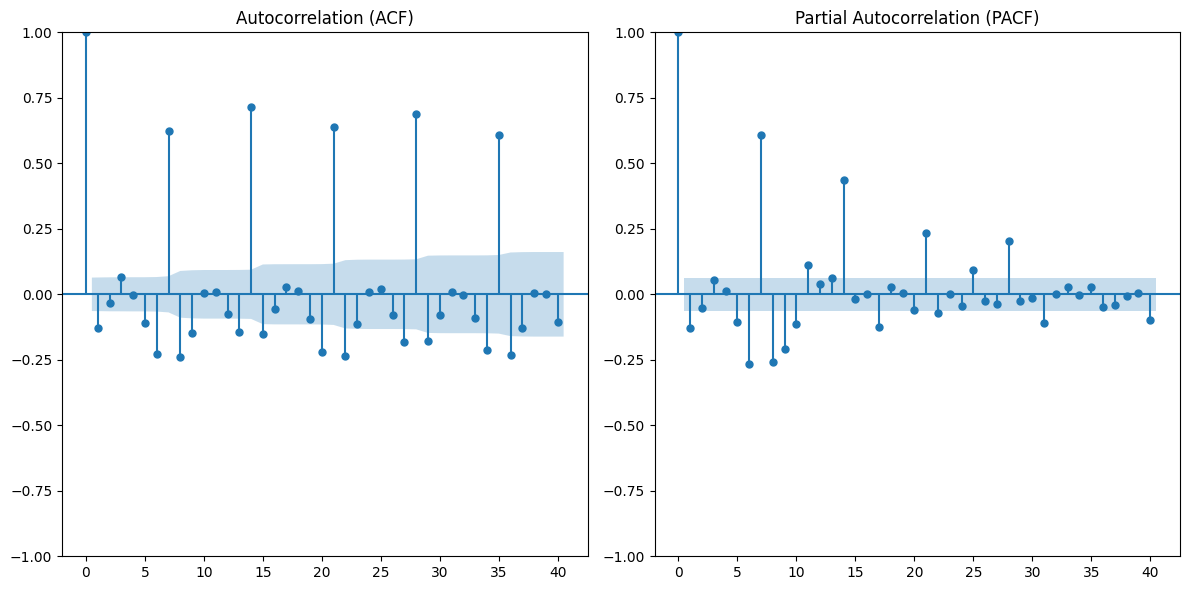

In [42]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

def check_autocorrelation(store_data):
    """
    Function to check autocorrelation and partial autocorrelation
    """
    # Calculate Autocorrelation (ACF) and Partial Autocorrelation (PACF)
    plt.figure(figsize=(12, 6))
    
    # ACF plot: Shows correlation between the series and its lagged versions
    plt.subplot(121)
    plot_acf(store_data['Sales'], lags=40, ax=plt.gca(), title="Autocorrelation (ACF)")
    
    # PACF plot: Shows the partial correlation after removing the influence of shorter lags
    plt.subplot(122)
    plot_pacf(store_data['Sales'], lags=40, ax=plt.gca(), title="Partial Autocorrelation (PACF)")
    
    # Show the plots
    plt.tight_layout()
    plt.show()

# Example usage
check_autocorrelation(store_data)


2025-01-14 17:26:14,990 - WARNING - 6 out of the last 14 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021E82CD3600> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step


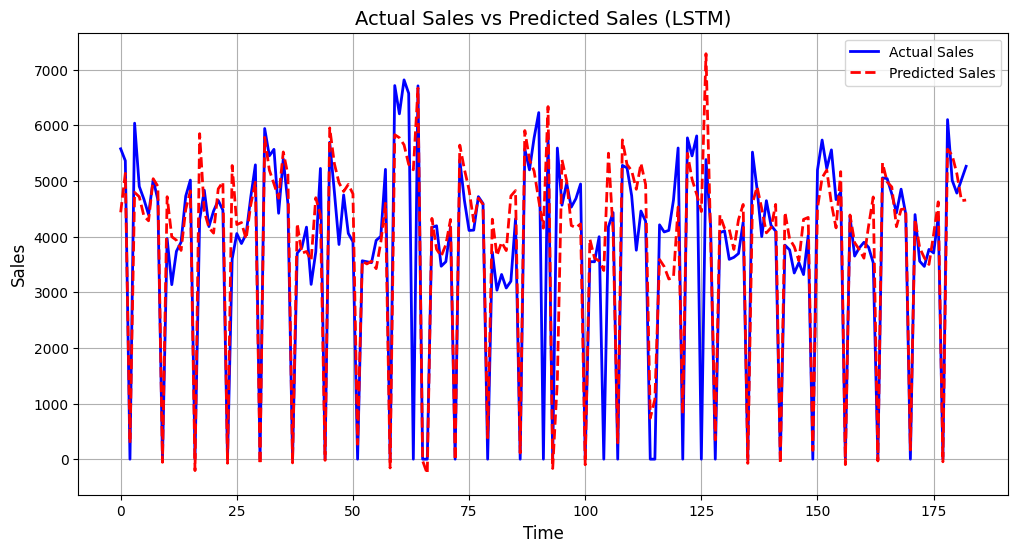

In [44]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted_sales(y_val, y_pred, scaler):
    """
    Plot Actual Sales vs Predicted Sales from LSTM.
    
    Args:
        y_val (np.array): True values from the validation set.
        y_pred (np.array): Predicted values from the LSTM model.
        scaler (MinMaxScaler): Scaler used to scale the data.
    """
    # Inverse transform the predictions and actual values to get them back to the original scale
    y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))  # Inverse transform y_val
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))  # Inverse transform y_pred

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_val_inv, label='Actual Sales', color='blue', linewidth=2)
    plt.plot(y_pred_inv, label='Predicted Sales', color='red', linestyle='--', linewidth=2)
    plt.title('Actual Sales vs Predicted Sales (LSTM)', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Plot actual vs predicted sales
plot_actual_vs_predicted_sales(y_val, y_pred, scaler)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8336\2273103242.py:158: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_file = pd.read_csv(r'c:\Users\Administrator\Desktop\KAIM\Rossmann_Pharmaceuticals_sales_forecast\data\train.csv')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8336\2273103242.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['StateHoliday'] = df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8336\2273103242.py:96: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method wi

Cross-validation RMSE: 841.8277319175766
Validation RMSE: 829.5788933576891
Feature names: Index(['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb_May_Aug_Nov', 'PromoInterval_Jan_Apr_Jul_Oct',
       'PromoInterval_Mar_Jun_Sept_Dec', 'PromoInterval_nan', 'Store',
       'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend'],
      dtype='object')


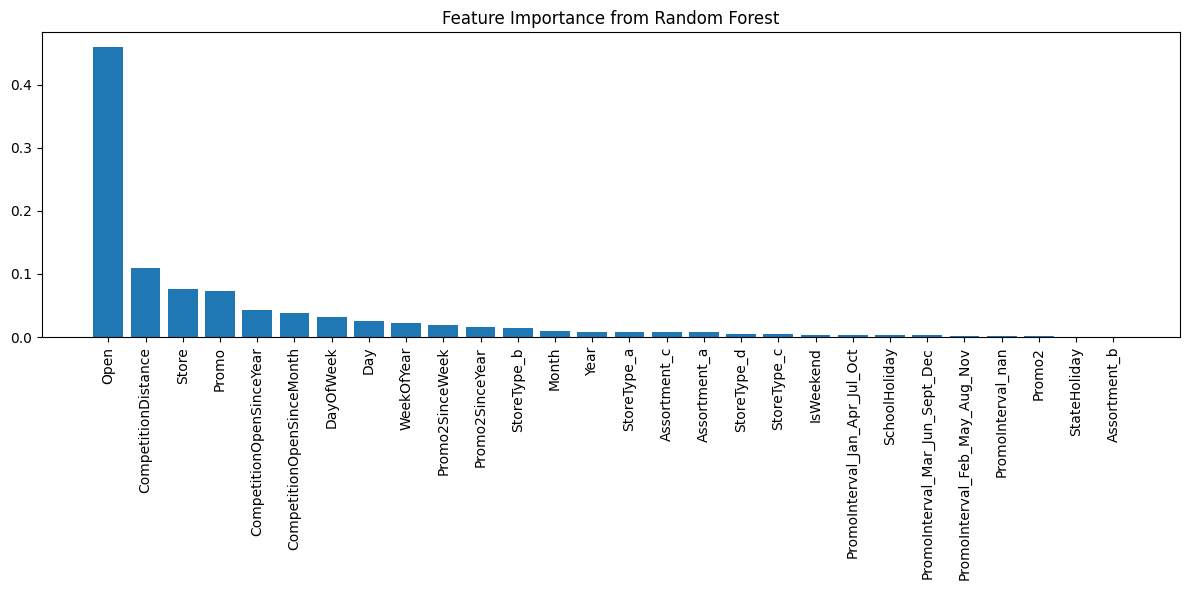

c:\Users\Administrator\Desktop\KAIM\sales_forecast\Rossmann_Pharmaceuticals_sales_forecast\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Administrator\Desktop\KAIM\sales_forecast\Rossmann_Pharmaceuticals_sales_forecast\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Administrator\Desktop\KAIM\sales_forecast\Rossmann_Pharmaceuticals_sales_forecast\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Administrator\Desktop\KAIM\sales_forecast\Rossmann_Pharmaceuticals_sales_forecast\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without

Prediction: 0.00, Lower Bound: 18762.34, Upper Bound: 29673.74
Prediction: 5244.76, Lower Bound: 3536.37, Upper Bound: 14006.07
Prediction: 5952.56, Lower Bound: 18762.34, Upper Bound: 29673.74
Prediction: 3641.92, Lower Bound: 17253.97, Upper Bound: 30583.91
Prediction: 13660.66, Lower Bound: 3034.08, Upper Bound: 15057.12
Prediction: 0.00, Lower Bound: 18762.34, Upper Bound: 29673.74
Prediction: 15542.76, Lower Bound: 3326.04, Upper Bound: 32610.00
Prediction: 6859.78, Lower Bound: 3536.37, Upper Bound: 14006.07
Prediction: 9790.22, Lower Bound: 3571.48, Upper Bound: 13990.64
Prediction: 8367.56, Lower Bound: 7360.30, Upper Bound: 38101.02


In [6]:
from estimate_confidence import estimate_confidence_intervals
from plot_feature_importance import plot_feature_importance

# Call the prediction function and get the model, train and validation data
model_pipeline, X_train, X_val, y_train, y_val = prediction()

# Display the feature names after processing
print("Feature names:", X_train.columns)


# Plot feature importance
plot_feature_importance(model_pipeline, X_train.columns)

# Estimate confidence intervals
lower_bound, upper_bound = estimate_confidence_intervals(model_pipeline, X_val)

# Show the predictions with confidence intervals
y_pred = model_pipeline.predict(X_val)
for i in range(10):  # Showing first 10 predictions and intervals
    print(f"Prediction: {y_pred[i]:.2f}, Lower Bound: {lower_bound[i]:.2f}, Upper Bound: {upper_bound[i]:.2f}")

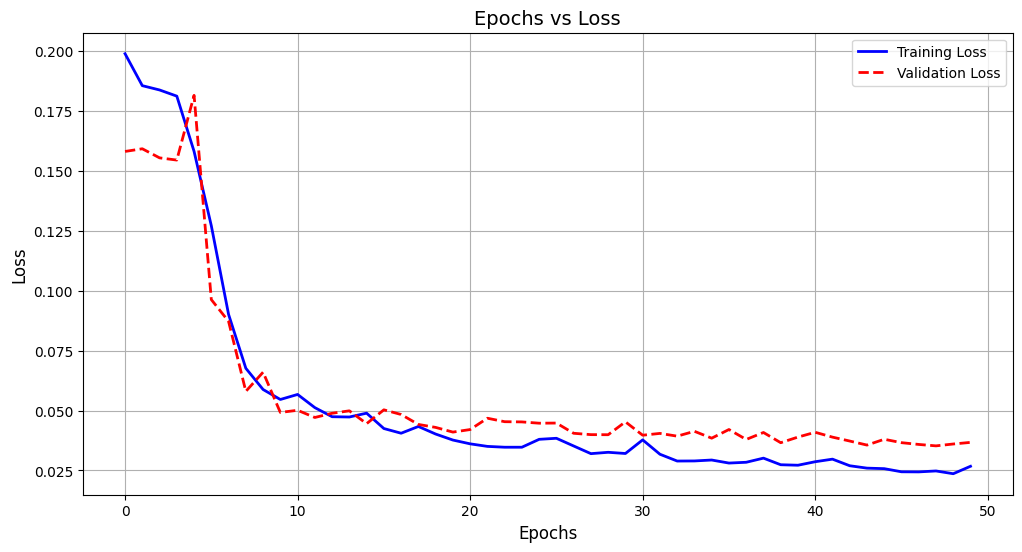

In [45]:
def plot_epochs_vs_loss(history):
    """
    Plot Epochs vs Loss for training and validation loss.
    
    Args:
        history (History): The history object returned by model.fit().
    """
    # Extract training and validation loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Plot epochs vs loss
    plt.figure(figsize=(12, 6))
    plt.plot(train_loss, label='Training Loss', color='blue', linewidth=2)
    plt.plot(val_loss, label='Validation Loss', color='red', linestyle='--', linewidth=2)
    plt.title('Epochs vs Loss', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot epochs vs loss graph
plot_epochs_vs_loss(history)